# Abalone
--------------------------------------------------------------------------------------------------------------------

![](https://ekd.me/wp-content/uploads/2020/06/v2-61b554ecd05f240ef8126ef9081f3e5f_1440w.jpg)

Целью данной задачи является предсказать возраст морского ушка на основе физических измерений регрессионных и других моделей и их анализа.

## Описание данных
*Целевая переменная* (target) – **Rings**: +1.5 gives the age in years (integer).
### Признаки
- Sex (nominal): M, F, and I (infant);
- Length (continuous, mm): Longest shell measurement;
- Diameter (continuous, mm): perpendicular to length;
- Height (continuous, mm): with meat in shell;
- Whole weight (continuous, grams): whole abalone;
- Shucked weight (continuous, grams): weight of meat;
- Viscera weight (continuous, grams): gut weight (after bleeding);
- Shell weight (continuous, grams): after being dried.

### Подготовка к исследованию данных

**Импорт необходимых библиотек**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Загружаем данные**

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Исследование данных

**Размер датасета**

In [4]:
df.shape

(4177, 9)

**Информация о типах данных и пропусках**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.isna().sum()/len(df)*100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

Пропуски состовляют не более трёх процентов. Заполним их медианой.

In [7]:
df['Diameter'].fillna(df['Diameter'].median(), inplace=True)
df['Whole weight'].fillna(df['Whole weight'].median(), inplace=True)
df['Shell weight'].fillna(df['Shell weight'].median(), inplace=True)

**Основные числовые характеристики**

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.408246,0.139516,0.826623,0.359367,0.180594,0.239023,9.933684
std,0.120093,0.098137,0.041827,0.484521,0.221963,0.109614,0.138108,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.447500,0.186000,0.093500,0.131500,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.141500,0.502000,0.253000,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Заметим, что в признаке `Height` минимальная высота 0. Посмотрим, сколько у нас таких наблюдений.

In [9]:
df['Height'].value_counts()[0.0]

2

Всего два наблюдения  - удалим их.

In [10]:
df = df.loc[df['Height'] != 0]

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.408305,0.139583,0.826884,0.359476,0.180653,0.239026,9.935090
std,0.120069,0.098116,0.041725,0.484479,0.221954,0.109605,0.138117,3.224227
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.447500,0.186250,0.093500,0.131500,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.141750,0.502000,0.253000,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Однофакторный анализ

Посмотрим распределение по `Sex`.

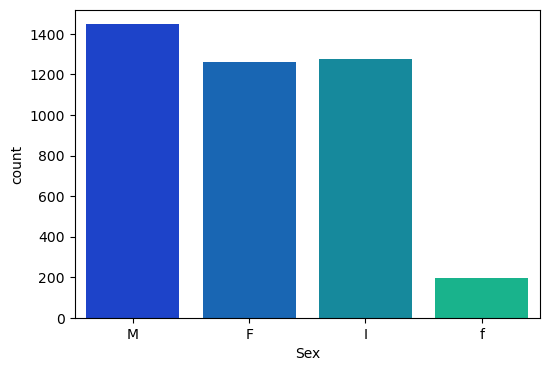

In [12]:
plt.figure(figsize=(6,4))

sns.countplot(x='Sex', data = df, palette='winter');

Заметим, что пол F записан по разному. Обработаем признак.

In [13]:
df['Sex'] = df['Sex'].replace('f', 'F')

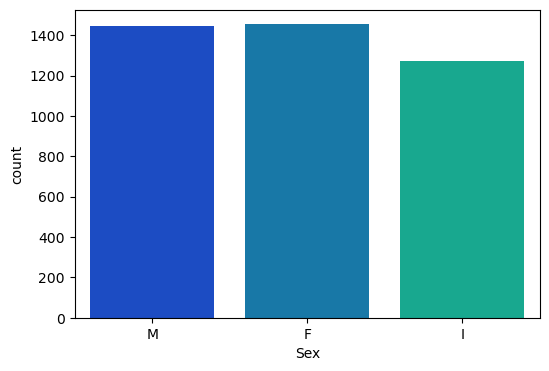

In [14]:
plt.figure(figsize=(6,4))

sns.countplot(x='Sex', data = df, palette='winter');

Видим, что объектов по полу примерно одинаково.

Визуализируем связь возраста морского ушка в зависимости от пола. На гистограмме изображены для каждой категории:
* средний возраст;
* доверительный интервал для среднего с вероятностью 95%.

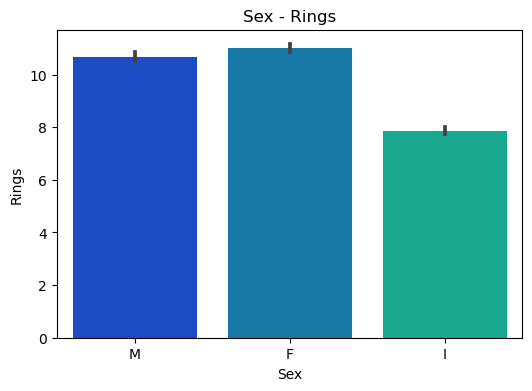

In [15]:
plt.figure(figsize=(6,4))

sns.barplot(x='Sex', y='Rings', data = df, palette='winter')
plt.title('Sex - Rings')
plt.show();

Посмотрим распределение `Length`.

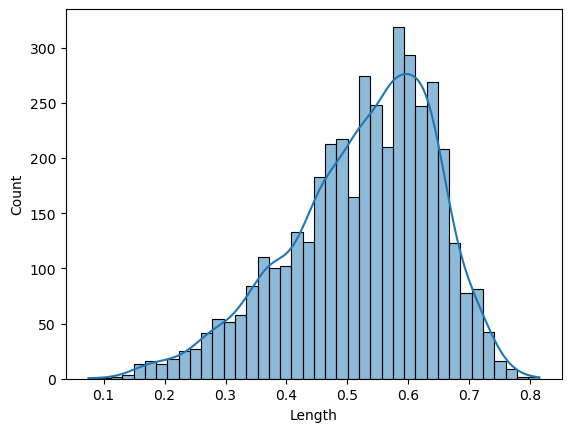

In [16]:
sns.histplot(df['Length'],bins=40, kde=True)
plt.show();

Посмотрим распределение `Diameter`.

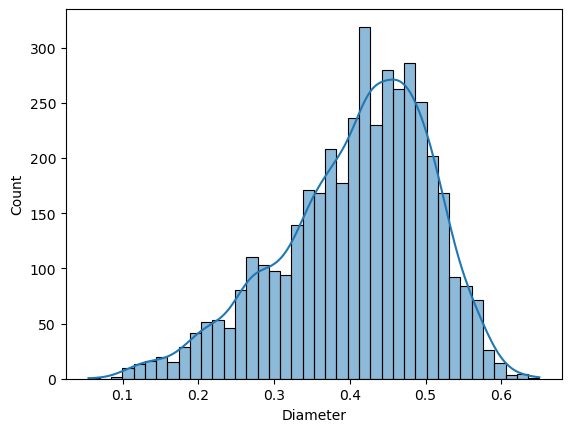

In [17]:
sns.histplot(df['Diameter'],bins=40, kde=True)
plt.show();

Посмотрим распределение `Height`.

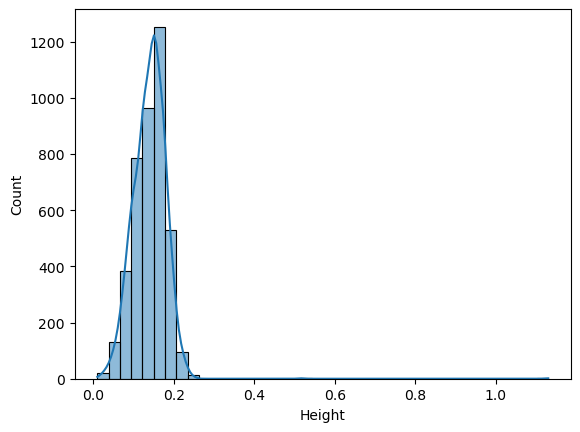

In [18]:
sns.histplot(df['Height'],bins=40, kde=True)
plt.show();

Посмотрим распределение `Whole weight`.

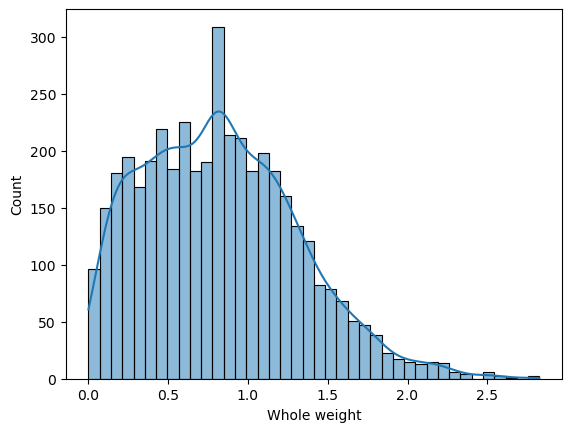

In [19]:
sns.histplot(df['Whole weight'],bins=40, kde=True)
plt.show();

Посмотрим распределение `Shucked weight`.

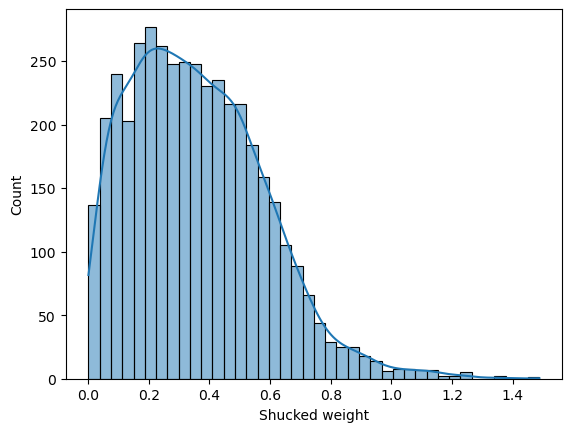

In [20]:
sns.histplot(df['Shucked weight'],bins=40, kde=True)
plt.show();

Посмотрим распределение `Viscera weight`.

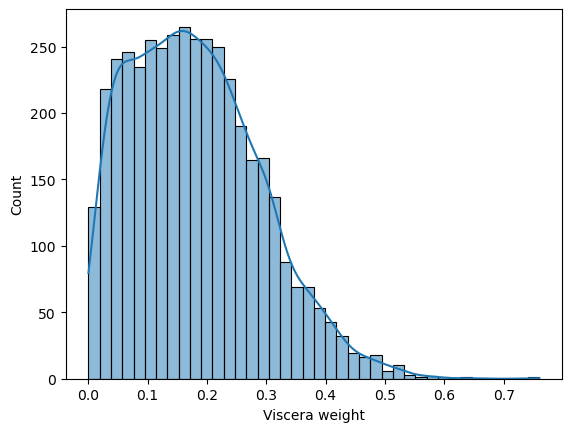

In [21]:
sns.histplot(df['Viscera weight'],bins=40, kde=True)
plt.show();

Посмотрим распределение `Shell weight`.

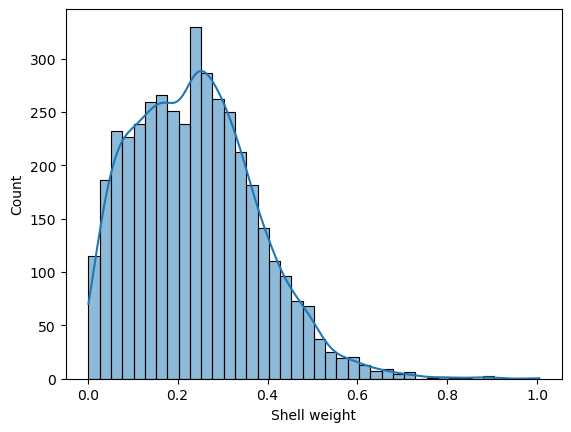

In [22]:
sns.histplot(df['Shell weight'],bins=40, kde=True)
plt.show();

In [23]:
feutures_int = list(set(df.columns) - set('sex'))

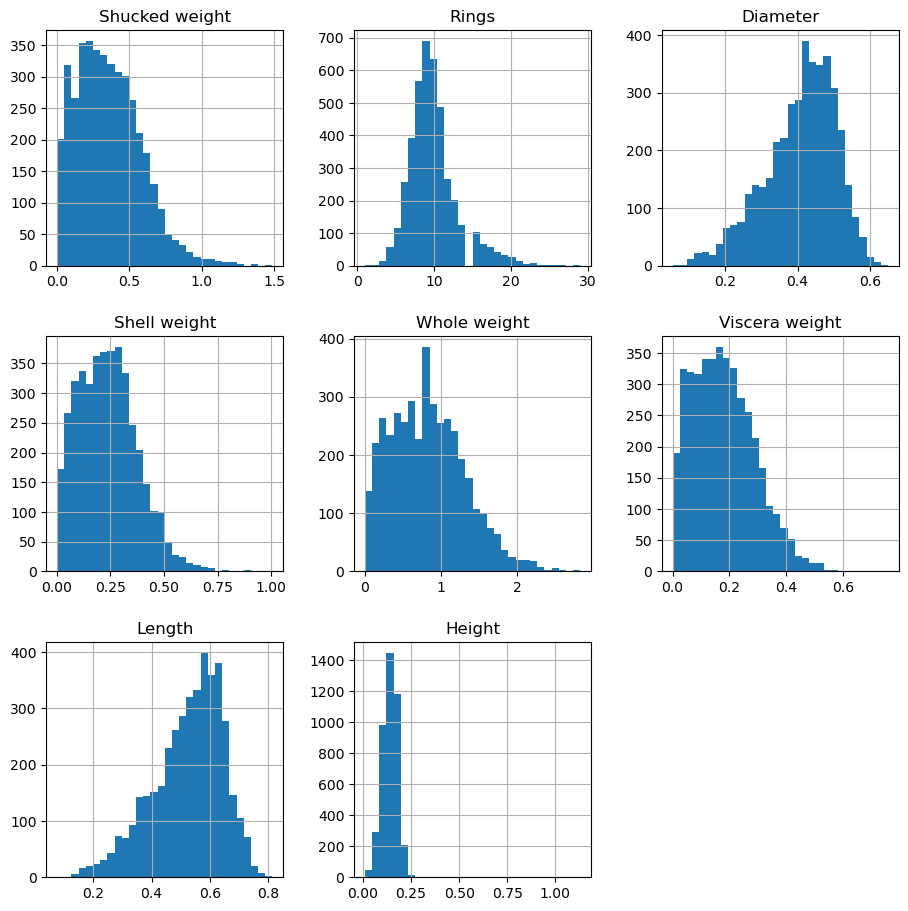

In [24]:
df.hist(column=feutures_int, figsize=(11, 11), bins=30); 

Посмотрим на корреляцию между признаками и целевой переменной. 

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

**Построим матрицу корреляций**

По Пирсону:

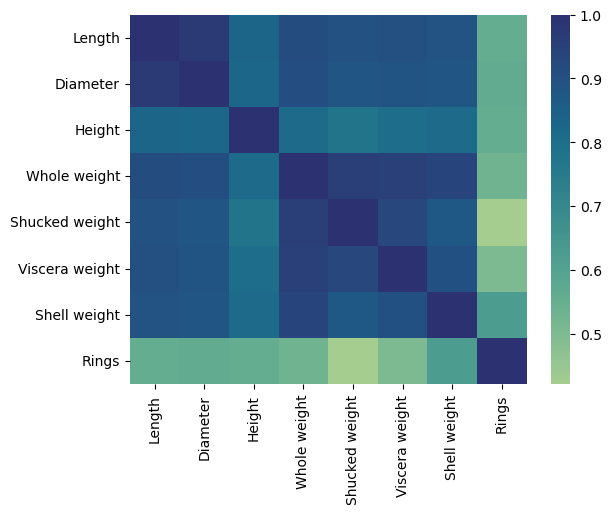

In [25]:
numeric_data = df.select_dtypes('number')
corr_pearson = numeric_data.corr()

sns.heatmap(corr_pearson, cmap='crest');

In [26]:
corr_pearson.style.background_gradient(cmap='crest')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.974672,0.828108,0.915373,0.897859,0.902960,0.890229,0.556464
Diameter,0.974672,1.000000,0.823578,0.906297,0.882314,0.888129,0.886509,0.563262
Height,0.828108,0.823578,1.000000,0.812083,0.775621,0.798908,0.811919,0.557625
Whole weight,0.915373,0.906297,0.812083,1.000000,0.957404,0.954007,0.934764,0.531904
Shucked weight,0.897859,0.882314,0.775621,0.957404,1.000000,0.931924,0.874844,0.420597
Viscera weight,0.902960,0.888129,0.798908,0.954007,0.931924,1.000000,0.899625,0.503562
Shell weight,0.890229,0.886509,0.811919,0.934764,0.874844,0.899625,1.000000,0.622547
Rings,0.556464,0.563262,0.557625,0.531904,0.420597,0.503562,0.622547,1.000000


По Спирмену:

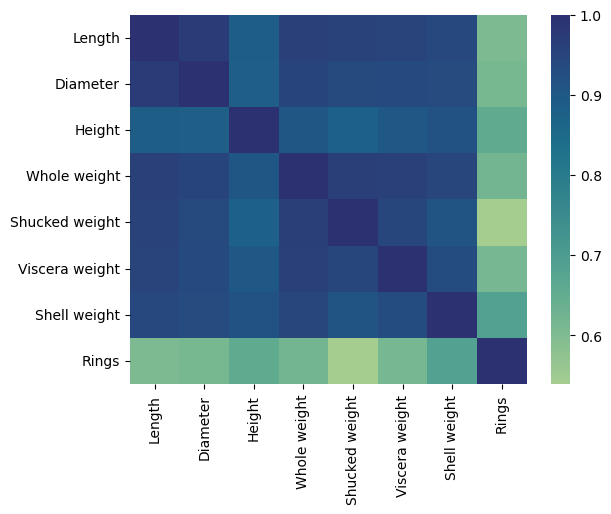

In [27]:
corr_spearman = numeric_data.corr('spearman')

sns.heatmap(corr_spearman, cmap='crest');

In [28]:
corr_spearman.style.background_gradient(cmap='crest')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.971210,0.888124,0.961391,0.956790,0.952600,0.940690,0.603954
Diameter,0.971210,1.000000,0.884342,0.949440,0.939081,0.936281,0.935026,0.611372
Height,0.888124,0.884342,1.000000,0.905681,0.874163,0.900535,0.914411,0.657403
Whole weight,0.961391,0.949440,0.905681,1.000000,0.966180,0.963691,0.950887,0.621466
Shucked weight,0.956790,0.939081,0.874163,0.966180,1.000000,0.947581,0.910271,0.538956
Viscera weight,0.952600,0.936281,0.900535,0.963691,0.947581,1.000000,0.930605,0.613930
Shell weight,0.940690,0.935026,0.914411,0.950887,0.910271,0.930605,1.000000,0.685760
Rings,0.603954,0.611372,0.657403,0.621466,0.538956,0.613930,0.685760,1.000000


По Кендаллу:

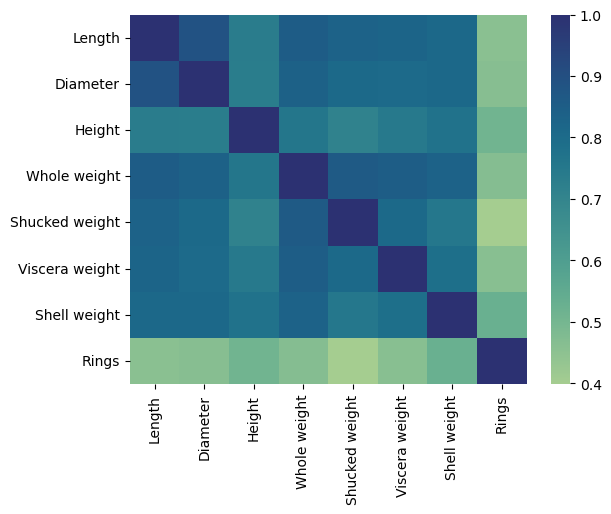

In [29]:
corr_kendall = numeric_data.corr('kendall')

sns.heatmap(corr_kendall, cmap='crest');

In [30]:
corr_kendall.style.background_gradient(cmap='crest')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.888520,0.734708,0.855226,0.835543,0.826177,0.813179,0.456897
Diameter,0.888520,1.000000,0.734120,0.840046,0.808333,0.803596,0.812724,0.464094
Height,0.734708,0.734120,1.000000,0.758277,0.712090,0.748426,0.772537,0.509180
Whole weight,0.855226,0.840046,0.758277,1.000000,0.862661,0.853226,0.833924,0.468076
Shucked weight,0.835543,0.808333,0.712090,0.862661,1.000000,0.809565,0.754567,0.398754
Viscera weight,0.826177,0.803596,0.748426,0.853226,0.809565,1.000000,0.787006,0.460982
Shell weight,0.813179,0.812724,0.772537,0.833924,0.754567,0.787006,1.000000,0.528260
Rings,0.456897,0.464094,0.509180,0.468076,0.398754,0.460982,0.528260,1.000000


*Комментарий*: видим, что не зависимо от метода, все признаки имеют сильную корреляцию (выше 0.7). Можем иметь проблему мультиколлинеарности. При этом с целевой переменной прослеживается средняя прямая связь.

Воспользуемся статистическим методом **ANOVA** для измерения связи между числовым - категориальным признаками.уппами.

**ANOVA**

In [31]:
from scipy.stats import f_oneway

In [32]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


Видим, что номинальный признак `Sex` коррелирует со всеми числовыми признаками.

### Анализ целевой переменной

Посмотрим распределение `Rings`

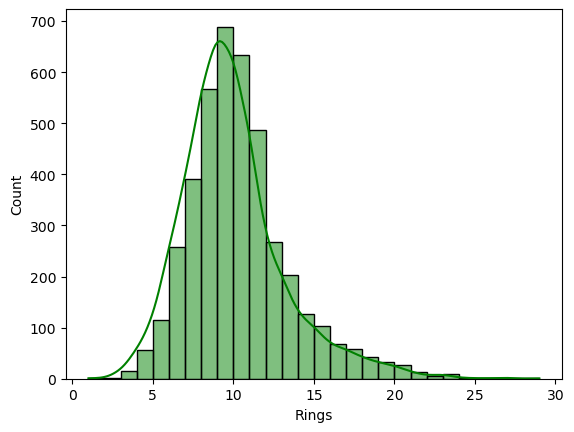

In [33]:
sns.histplot(df['Rings'],bins=28, kde=True, color='green')
plt.show();

Распределение данных похоже на нормальное с положительной асимметрией (правое смещение кривой).
Посчитаем асимметрию.

In [34]:
df['Rings'].describe()

count    4175.000000
mean        9.935090
std         3.224227
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

In [35]:
def df_skew(data_colomn):
    '''Получить коэффициент асимметрии нормального распределения'''
    s = data_colomn
    return {'Среднее': s.mean().round(2), 
            'Медиана': int(s.median()),
            'Мода': s.mode()[0],
            'Асимметрия': s.skew().round(2)
           }

In [36]:
dict_rings_skew = df_skew(df['Rings'])

for k, v in dict_rings_skew.items():
    print(f'{k}: {v}') 

Среднее: 9.94
Медиана: 9
Мода: 9
Асимметрия: 1.11


Коэффициент асимметрии составляет порядка 1.11. Этот коэффициент количественно определяет степень скошенности, которая видна на гистограмме.

**Взаимосвязь целевого признака с количественной переменной**

In [37]:
from scipy.stats import pointbiserialr

for feuture in numeric_data:
    if feuture == 'Rings':
        continue
    corrcoef = pointbiserialr(df[feuture].fillna(0), df['Rings'])[0]
    print(f'Связь переменной {feuture} с целевой переменной', round(corrcoef, 2))

Связь переменной Length с целевой переменной 0.56
Связь переменной Diameter с целевой переменной 0.56
Связь переменной Height с целевой переменной 0.56
Связь переменной Whole weight с целевой переменной 0.53
Связь переменной Shucked weight с целевой переменной 0.42
Связь переменной Viscera weight с целевой переменной 0.5
Связь переменной Shell weight с целевой переменной 0.62


*Комментарий*: выявлены средние силы связи между `Rings` и признаками, исключая `Shucked weight` (в ней наблюдаем слабую).

## EDA results
1. В изначальном наборе данных процент пропусков состовлял не более 3%. Принято решение заменить пропуски на медианные значения;
2. Была замечено, что признаки имеют сильную корреляцию (свыше 0.7), что говорит о проблеме мультиколлинеарности, которая в дальнейшем может отразиться на качестве построенной модели;
3. Целевая переменная имеет средние силы связи с признаками;
4. Целевая переменная обладает положительной асимметрией данных, что в задаче регрессии может привести к проблеме искажению результатов модели и неверным выводам (например, модель будет менее точно предсказывать значения для меньшего класса).